# MACHINE LEARNING MODEL FOR PREDICTING THE PREVALENCE OF MALARIA OUTBREAK IN NIGERIA (2009-2018)
Executive Summary:

This project seeks to get the prevalence of malaria outbreak in Nigeria using a dataset sourced from Kaggle.com, in order to determine the age group that is most susceptible to the disease. Deliverables:

• The age group that is most susceptible to malaria attack;

• The gender that is most prone to malaria attack based on age group;

• The State with the highest incidence of malaria attack in Nigeria;

• The Geopolitical Zone that is most susceptible to malaria attacks;

• It also answers the question if the state with the highest incidence suffers the greatest fatality.

In [2]:
# Import all libraries to carry out an EDA
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Load data set
df_malaria = pd.read_csv('malaria_dataset.csv')

In [4]:
#To know number of rows and columns
df_malaria.shape

(284484, 41)

In [5]:
# Header (To check the first 5 rows)
df_malaria.head()

,id,surname,firstname,middlename,gender,gender_male,gender_female,state,Region,settlement,...,NmA,NmC,NmW,health_status,alive,dead,report_outcome,unconfirmed,confirmed,null_serotype
0,1,Solade,Grace,Solape,Female,0,1,Rivers,South-South,Rural,...,0,0,0,Alive,1,0,confirmed,0,1,1
1,2,Eneche,Kure,Balogun,Male,1,0,Ebonyi,South East,Rural,...,0,0,1,Alive,1,0,Confirmed,1,0,1
2,3,Sanusi,Adaugo,Katerine,Female,0,1,Ogun,South West,Urban,...,0,0,1,Dead,0,1,Not Confirmed,1,0,1
3,4,Sowore,Mooslemat,Ifedayo,Female,0,1,Ondo,South West,Rural,...,0,0,1,Alive,1,0,Not Confirmed,1,0,1
4,5,Abdusalam,Yusuf,Okafor,Male,1,0,Oyo,South West,Urban,...,0,0,1,Alive,1,0,Confirmed,1,0,1


In [6]:
# Footer(To check the last 5 rows)
df_malaria.tail()

,id,surname,firstname,middlename,gender,gender_male,gender_female,state,Region,settlement,...,NmA,NmC,NmW,health_status,alive,dead,report_outcome,unconfirmed,confirmed,null_serotype
284479,288418,Mukthar,Alimat,Ajibewa,Female,0,1,Cross River,South-South,Rural,...,0,0,1,Dead,0,1,Confirmed,1,0,1
284480,288419,Akenzua,Deborah,Rofeeqat,Female,0,1,Kwara,North Central,Urban,...,0,0,1,Dead,0,1,Confirmed,1,0,1
284481,288420,Isa,Deborah,Tofunmi,Female,0,1,Katsina,North West,Rural,...,0,0,1,Alive,1,0,Confirmed,0,1,1
284482,288421,Uba,Ismail,Akpabio,Male,1,0,Jigawa,North West,Rural,...,0,0,1,Dead,0,1,Not Confirmed,1,0,1
284483,288422,Alao,Paulina,Sade,Female,0,1,Kogi,North Central,Urban,...,0,0,1,Alive,1,0,Confirmed,0,1,1


In [7]:
# To check for missing data
df_malaria.isna().sum()

id                            0
surname                       0
firstname                     0
middlename                    0
gender                        0
gender_male                   0
gender_female                 0
state                         0
Region                        0
settlement                    0
rural_settlement              0
urban_settlement              0
report_date                   0
report_year                   0
age                           0
age_str                       0
date_of_birth                 0
child_group                   0
adult_group                   0
disease                       0
cholera                       0
diarrhoea                     0
measles                       0
viral_haemmorrhaphic_fever    0
meningitis                    0
ebola                         0
marburg_virus                 0
yellow_fever                  0
rubella_mars                  0
malaria                       0
serotype                      0
NmA     

In [8]:
# we use the describe method to set to understand the kind of dataset we are working with

df_malaria.describe()

,id,gender_male,gender_female,rural_settlement,urban_settlement,report_year,age,child_group,adult_group,cholera,...,rubella_mars,malaria,NmA,NmC,NmW,alive,dead,unconfirmed,confirmed,null_serotype
count,284484.000000,284484.000000,284484.000000,284484.000000,284484.000000,284484.000000,284484.000000,284484.000000,284484.000000,284484.000000,...,284484.000000,284484.000000,284484.000000,284484.000000,284484.000000,284484.000000,284484.000000,284484.000000,284484.000000,284484.000000
mean,144727.037932,0.482319,0.517681,0.501128,0.498872,2013.503097,34.732396,0.291707,0.708293,0.100494,...,0.100318,0.100304,0.024740,0.025063,0.950194,0.499835,0.500165,0.749691,0.250309,0.900304
std,83406.850454,0.499688,0.499688,0.500000,0.500000,2.871560,22.240912,0.454549,0.454549,0.300658,...,0.300425,0.300406,0.155331,0.156317,0.217544,0.500001,0.500001,0.433192,0.433192,0.299595
min,1.000000,0.000000,0.000000,0.000000,0.000000,2009.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,72441.750000,0.000000,0.000000,0.000000,0.000000,2011.000000,14.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,144916.500000,0.000000,1.000000,1.000000,0.000000,2013.000000,34.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
75%,217301.250000,1.000000,1.000000,1.000000,1.000000,2016.000000,54.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,288422.000000,1.000000,1.000000,1.000000,1.000000,2018.000000,78.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
# the info call method describes the type of dataset (int or obj)
df_malaria.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284484 entries, 0 to 284483
Data columns (total 41 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   id                          284484 non-null  int64 
 1   surname                     284484 non-null  object
 2   firstname                   284484 non-null  object
 3   middlename                  284484 non-null  object
 4   gender                      284484 non-null  object
 5   gender_male                 284484 non-null  int64 
 6   gender_female               284484 non-null  int64 
 7   state                       284484 non-null  object
 8   Region                      284484 non-null  object
 9   settlement                  284484 non-null  object
 10  rural_settlement            284484 non-null  int64 
 11  urban_settlement            284484 non-null  int64 
 12  report_date                 284484 non-null  object
 13  report_year                 2

In [10]:
# we view the columns from the dataset to drop the columns that are not needed
df_malaria.columns

Index(['id', 'surname', 'firstname', 'middlename', 'gender', 'gender_male',
       'gender_female', 'state', 'Region', 'settlement', 'rural_settlement',
       'urban_settlement', 'report_date', 'report_year', 'age', 'age_str',
       'date_of_birth', 'child_group', 'adult_group', 'disease', 'cholera',
       'diarrhoea', 'measles', 'viral_haemmorrhaphic_fever', 'meningitis',
       'ebola', 'marburg_virus', 'yellow_fever', 'rubella_mars', 'malaria',
       'serotype', 'NmA', 'NmC', 'NmW', 'health_status', 'alive', 'dead',
       'report_outcome', 'unconfirmed', 'confirmed', 'null_serotype'],
      dtype='object')

In [11]:
# we concatenate to get the full names of the individuals so we can do away with the surname, firstname... columns

df_malaria['full_name'] = df_malaria['surname'] +" "+ df_malaria['firstname'] +" "+ df_malaria['middlename']
df_malaria['full_name']

0              Solade Grace Solape
1              Eneche Kure Balogun
2           Sanusi Adaugo Katerine
3         Sowore Mooslemat Ifedayo
4           Abdusalam Yusuf Okafor
                    ...           
284479      Mukthar Alimat Ajibewa
284480    Akenzua Deborah Rofeeqat
284481         Isa Deborah Tofunmi
284482          Uba Ismail Akpabio
284483           Alao Paulina Sade
Name: full_name, Length: 284484, dtype: object

In [12]:
# the columns that are not needed are dropped to ensure the columns are as minimal as possible while maintaining the numbers of rows

df_malaria.drop(columns = ['id', 'surname', 'firstname', 'middlename', 'gender_male', 'gender_female', 'rural_settlement', 'urban_settlement',
                           'report_date','age_str','date_of_birth', 'disease', 'cholera','diarrhoea', 
                           'measles', 'viral_haemmorrhaphic_fever', 'meningitis','ebola', 'marburg_virus', 'yellow_fever',
                           'rubella_mars','serotype', 'NmA', 'NmC', 'NmW', 'alive', 'dead', 'confirmed', 'unconfirmed',
                           'null_serotype'], inplace  = True)

In [13]:
# Testing the data set after dropping some columns.
# The columns dropped from 40 to 12.
df_malaria

,gender,state,Region,settlement,report_year,age,child_group,adult_group,malaria,health_status,report_outcome,full_name
0,Female,Rivers,South-South,Rural,2018,32,0,1,0,Alive,confirmed,Solade Grace Solape
1,Male,Ebonyi,South East,Rural,2017,32,0,1,0,Alive,Confirmed,Eneche Kure Balogun
2,Female,Ogun,South West,Urban,2012,24,0,1,0,Dead,Not Confirmed,Sanusi Adaugo Katerine
3,Female,Ondo,South West,Rural,2010,63,0,1,0,Alive,Not Confirmed,Sowore Mooslemat Ifedayo
4,Male,Oyo,South West,Urban,2017,9,1,0,0,Alive,Confirmed,Abdusalam Yusuf Okafor
...,...,...,...,...,...,...,...,...,...,...,...,...
284479,Female,Cross River,South-South,Rural,2012,67,0,1,0,Dead,Confirmed,Mukthar Alimat Ajibewa
284480,Female,Kwara,North Central,Urban,2009,64,0,1,0,Dead,Confirmed,Akenzua Deborah Rofeeqat
284481,Female,Katsina,North West,Rural,2010,33,0,1,1,Alive,Confirmed,Isa Deborah Tofunmi
284482,Male,Jigawa,North West,Rural,2016,18,0,1,1,Dead,Not Confirmed,Uba Ismail Akpabio


In [14]:
# Restricting our data set to malaria reduced the number or rows from 284,484 to 28,535.
# This is about 10% reduction
df_malaria = df_malaria[df_malaria['malaria'] > 0]
df_malaria

,gender,state,Region,settlement,report_year,age,child_group,adult_group,malaria,health_status,report_outcome,full_name
19,Female,Adamawa,North East,Rural,2017,39,0,1,1,Alive,Not Confirmed,Buhari Janet Orieskwe
21,Female,Rivers,South-South,Urban,2011,14,1,0,1,Alive,Confirmed,Eleojo Adaugo Aderemi
37,Female,Kaduna,North West,Rural,2010,66,0,1,1,Dead,Confirmed,Aterigbade Debby Chika
38,Male,Jigawa,North West,Urban,2017,8,1,0,1,Alive,Not Confirmed,Ahuta Mooslem Adeyemi
40,Female,Oyo,South West,Urban,2011,17,1,0,1,Alive,Confirmed,Quayum Alexandria Beatrice
...,...,...,...,...,...,...,...,...,...,...,...,...
284425,Male,Enugu,South East,Rural,2017,15,1,0,1,Alive,Not Confirmed,Micheal Bala Chidebere
284431,Male,Benue,North Central,Urban,2018,48,0,1,1,Dead,Confirmed,Ojeleye Ismail Adegboyega
284443,Male,Kano,North West,Rural,2015,71,0,1,1,Alive,Confirmed,Osareme Danjuma Okafor
284481,Female,Katsina,North West,Rural,2010,33,0,1,1,Alive,Confirmed,Isa Deborah Tofunmi


In [15]:
# Analizing the reporting year vs number of people infected with malaria
df_malaria.groupby('report_year')['report_year'].count()

report_year
2009    2884
2010    2905
2011    2740
2012    2747
2013    2890
2014    2853
2015    2810
2016    2903
2017    2900
2018    2903
Name: report_year, dtype: int64

<AxesSubplot:xlabel='report_year'>

(array([2725., 2750., 2775., 2800., 2825., 2850., 2875., 2900., 2925.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

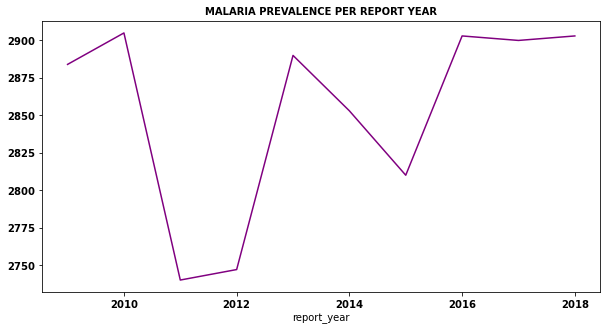

In [55]:
plt.rcParams['figure.figsize'] = [10, 5]
display(df_malaria.groupby('report_year')['malaria'].sum().astype(int).plot.line(color ='purple'))

plt.xticks(rotation = 0, fontweight = 'bold', fontsize =10)
plt.title('MALARIA PREVALENCE PER REPORT YEAR', fontsize = 10, fontweight = 'bold')
plt.ylabel('')
plt.yticks(fontweight = 'bold',fontsize =10)

In [16]:
# General information about the dataset
df_malaria.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28535 entries, 19 to 284482
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   gender          28535 non-null  object
 1   state           28535 non-null  object
 2   Region          28535 non-null  object
 3   settlement      28535 non-null  object
 4   report_year     28535 non-null  int64 
 5   age             28535 non-null  int64 
 6   child_group     28535 non-null  int64 
 7   adult_group     28535 non-null  int64 
 8   malaria         28535 non-null  int64 
 9   health_status   28535 non-null  object
 10  report_outcome  28535 non-null  object
 11  full_name       28535 non-null  object
dtypes: int64(5), object(7)
memory usage: 2.8+ MB


In [17]:
# Sorting into states
print(df_malaria['state'].unique())

['Adamawa' 'Rivers' 'Kaduna' 'Jigawa' 'Oyo' 'Imo' 'Lagos' 'Edo' 'Yobe'
 'Ondo' 'Katsina' 'Sokoto' 'Ekiti' 'Gombe' 'Osun' 'Anambra' 'Akwa Ibom'
 'Ebonyi' 'Benue' 'Kwara' 'Plateau' 'Kogi' 'Delta' 'Ogun' 'Kebbi'
 'Nasarawa' 'Taraba' 'Cross River' 'Bayelsa' 'Borno' 'Niger' 'Zamfara'
 'Enugu' 'Federal Capital Territory' 'Abia' 'Kano' 'Bauchi']


In [18]:
# Getting the number of reported malaria cases acording to states.
# From this we can confirm that Kano and Kwara had the highest number of malaria cases reported while 
# Plateau had the lowest number of malaria cases reported.
df_malaria['state'].value_counts()

Kano                         833
Kwara                        833
Ebonyi                       831
Federal Capital Territory    805
Edo                          805
Akwa Ibom                    801
Jigawa                       801
Abia                         798
Kebbi                        797
Taraba                       786
Sokoto                       783
Bayelsa                      783
Ogun                         780
Katsina                      778
Kogi                         778
Adamawa                      778
Delta                        773
Benue                        771
Osun                         770
Ondo                         769
Niger                        769
Cross River                  768
Lagos                        767
Yobe                         767
Rivers                       759
Oyo                          758
Ekiti                        755
Anambra                      753
Zamfara                      753
Kaduna                       751
Bauchi    

In [19]:
# Gender distribution in terms of malaria cases.
# female were more prone to malaria attack that male.
df_malaria['gender'].value_counts()

Female    14630
Male      13905
Name: gender, dtype: int64

In [20]:
# Sorted the malaria cases reported according to settlement.
# The people who live in the urban area are more vulnerable to malaria attack.
df_malaria['settlement'].value_counts()

Urban    14331
Rural    14204
Name: settlement, dtype: int64

In [21]:
# Examining the fatality rating of the disease.
df_malaria['health_status'].value_counts()

Alive    14365
Dead     14170
Name: health_status, dtype: int64

In [22]:
# Determining the number of death/survival in bot settlements and gender.
# Irrespective of the settlement the female gender suffered most fatality.
df_malaria.groupby(['settlement','health_status','gender'])['health_status'].count()

settlement  health_status  gender
Rural       Alive          Female    3653
                           Male      3453
            Dead           Female    3611
                           Male      3487
Urban       Alive          Female    3749
                           Male      3510
            Dead           Female    3617
                           Male      3455
Name: health_status, dtype: int64

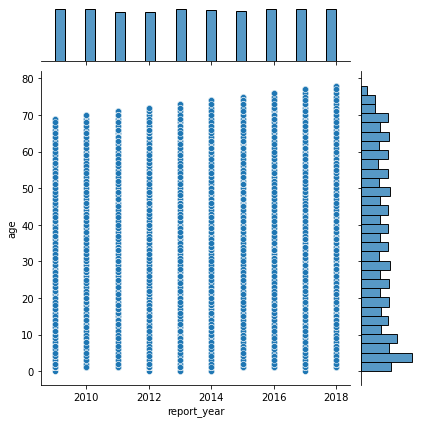

In [23]:
# Ploted the age versus reported year.
# As the year increases the resistance to malaria decreases.
sns.jointplot( y = 'age', x= 'report_year', data = df_malaria)

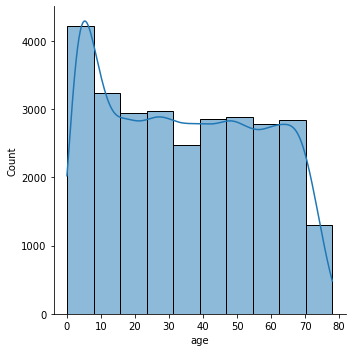

In [24]:
# Plotted agegroup versus reported cases of malaria.
# The age group 0-10 years are mostly affected by malaria.
sns.displot(df_malaria['age'], kde = True, bins = 10)

<AxesSubplot:xlabel='state'>

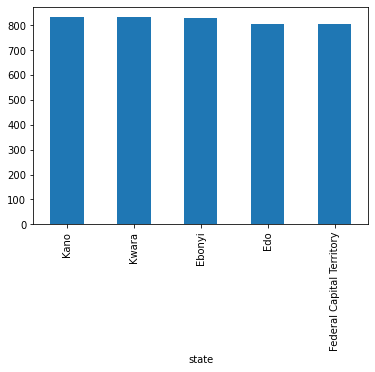

In [25]:
# Plotted the first 5 most affected states.
df_malaria.groupby('state')['malaria'].count().sort_values(ascending = False).head(5).plot.bar()

<AxesSubplot:xlabel='state'>

(array([700., 720., 740., 760., 780., 800., 820., 840.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

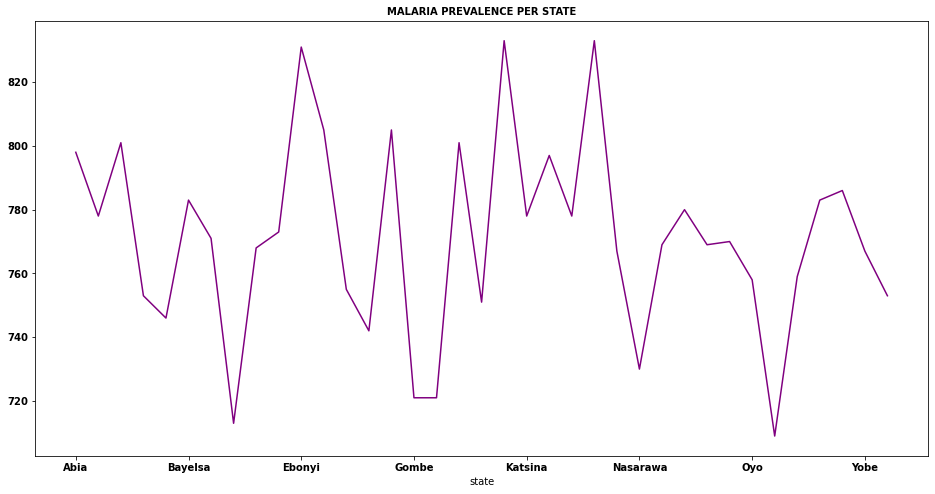

In [53]:
# Plotted the cases of malaria prevalence according to geo-political zones using a line graph
plt.rcParams['figure.figsize'] = [16, 8]
display(df_malaria.groupby('state')['malaria'].sum().astype(int).plot.line(color ='purple'))

plt.xticks(rotation = 0, fontweight = 'bold', fontsize =10)
plt.title('MALARIA PREVALENCE PER STATE', fontsize = 10, fontweight = 'bold')
plt.ylabel('')
plt.yticks(fontweight = 'bold',fontsize =10)

<AxesSubplot:xlabel='state'>

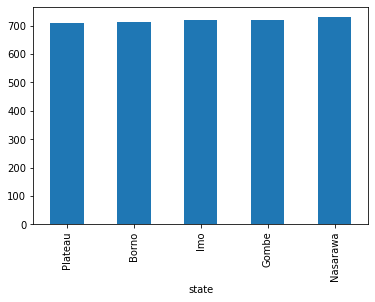

In [26]:
# Plotted the least 5 affected states.
df_malaria.groupby('state')['malaria'].count().sort_values(ascending = True).head(5).plot.bar()

<AxesSubplot:xlabel='Region'>

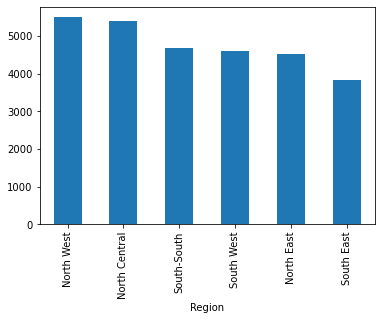

In [27]:
# Plotted the cases of malaria prevalence according to geo-political zones using a bar-chart
df_malaria.groupby('Region')['malaria'].count().sort_values(ascending = False).plot. bar()

<AxesSubplot:xlabel='Region'>

(array([3750., 4000., 4250., 4500., 4750., 5000., 5250., 5500., 5750.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

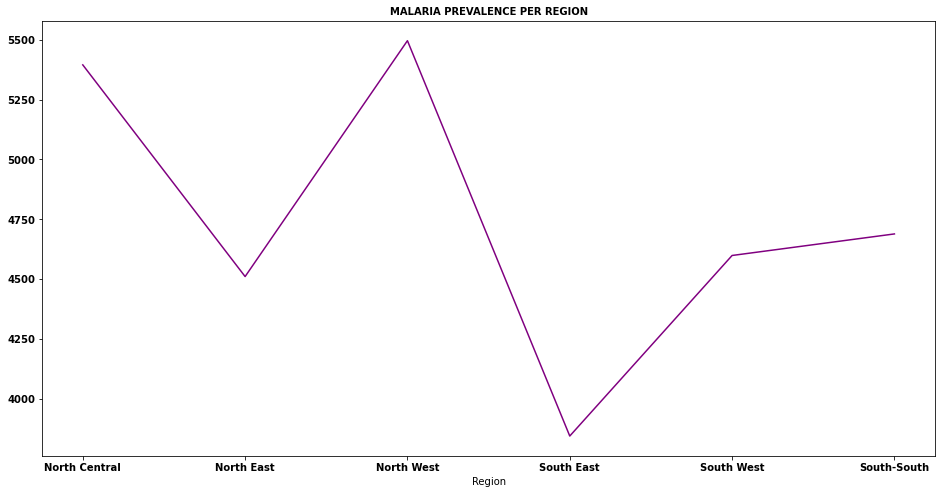

In [54]:
# Plotted the cases of malaria prevalence according to geo-political zones using a line graph
plt.rcParams['figure.figsize'] = [16, 8]
display(df_malaria.groupby('Region')['malaria'].sum().astype(int).plot.line(color ='purple'))

plt.xticks(rotation = 0, fontweight = 'bold', fontsize =10)
plt.title('MALARIA PREVALENCE PER REGION', fontsize = 10, fontweight = 'bold')
plt.ylabel('')
plt.yticks(fontweight = 'bold',fontsize =10)

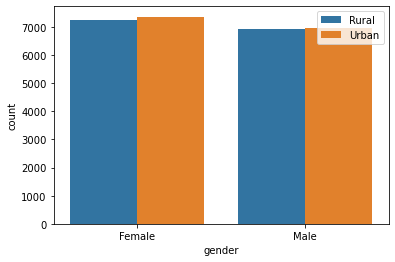

In [28]:
# Plotted the cases of malaria prevalence acording to gender and settlement.
sns.countplot(x = 'gender', data = df_malaria, hue = 'settlement')
plt.legend(loc = 0)

<AxesSubplot:ylabel='malaria'>

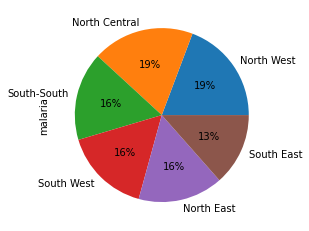

In [29]:
# A pie Chart showing the percentage of prevalence per geo-political zones.
# The Nort-west and North-central had the highest prevalence.
df_malaria.groupby('Region')['malaria'].count().sort_values(ascending = False).plot.pie(autopct='%.0f%%')


In [30]:
# Checking for survival/fatality prevalence in each state
# 
pd.set_option('display.max_rows', 74)
df_malaria.groupby(['state','health_status'])['health_status'].count()

state                      health_status
Abia                       Alive            399
                           Dead             399
Adamawa                    Alive            397
                           Dead             381
Akwa Ibom                  Alive            392
                           Dead             409
Anambra                    Alive            351
                           Dead             402
Bauchi                     Alive            374
                           Dead             372
Bayelsa                    Alive            377
                           Dead             406
Benue                      Alive            390
                           Dead             381
Borno                      Alive            345
                           Dead             368
Cross River                Alive            390
                           Dead             378
Delta                      Alive            395
                           Dead             378